In [1]:
import pandas as pd
import numpy as np

subpath = "distrib_tptt_experiment_y_original/2025-01-20T17:47:12"
data = pd.read_csv(f'{subpath}/total_X.csv', index_col=False)


In [3]:
data.drop(columns=['Unnamed: 6'], inplace=True)

In [22]:
group_carga = data.groupby(["carga", "período"])['nmae'].agg(['mean', 'std']).reset_index()

In [23]:
group_carga['std'] = round(100*group_carga['std'], 0)
group_carga['mean'] = round(100*group_carga['mean'], 0)

In [24]:
group_carga

,carga,período,mean,std
0,FlashcrowdLoad,8,8.0,0.0
1,FlashcrowdLoad,16,10.0,1.0
2,FlashcrowdLoad,32,11.0,1.0
3,FlashcrowdLoad,64,13.0,1.0
4,FlashcrowdLoad,128,15.0,5.0
5,FlashcrowdLoad,256,19.0,3.0
6,PeriodicLoad,8,10.0,2.0
7,PeriodicLoad,16,12.0,3.0
8,PeriodicLoad,32,12.0,3.0
9,PeriodicLoad,64,11.0,1.0


In [16]:
group = data.groupby(["período"])['nmae'].agg(['mean', 'std']).reset_index()

In [5]:
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)

In [6]:
group

,período,mean,std
0,8,9.0,2.0
1,16,11.0,2.0
2,32,11.0,2.0
3,64,12.0,2.0
4,128,13.0,5.0
5,256,15.0,5.0


In [7]:
new_data = pd.DataFrame({'período': [1], 'mean': [12], 'std': [2]})

total_table = pd.concat([group, new_data], ignore_index=True)


In [8]:
total_table.set_index('período', inplace=True)

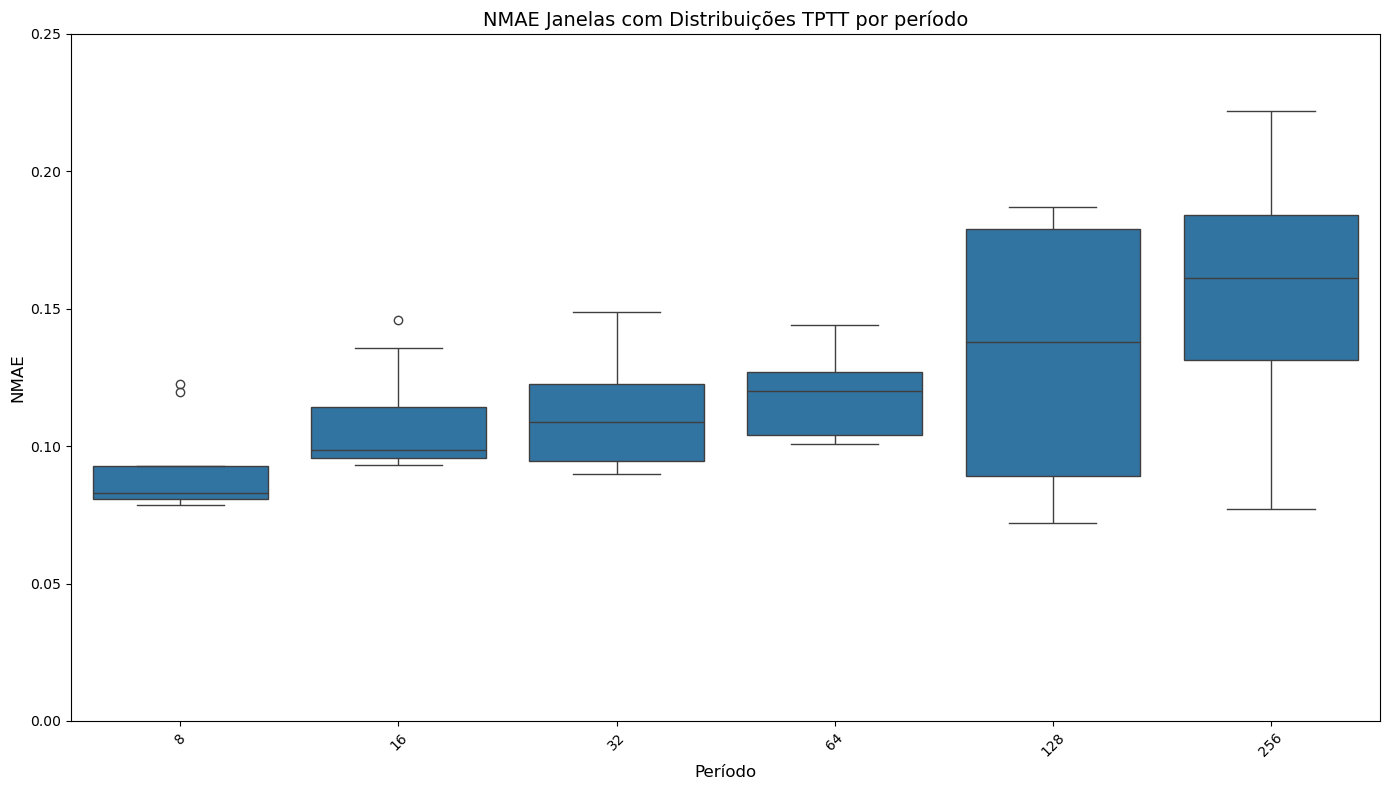

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data)

plt.xlabel("Período", fontsize=12)
plt.ylabel("NMAE", fontsize=12)
plt.title("NMAE Janelas com Distribuições TPTT por período", fontsize=14)
plt.xticks(rotation=45)
y_limits = (0, 0.25)
plt.ylim(y_limits)
plt.tight_layout()

plt.show()

In [11]:
group_by_method = data.groupby(["período", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [12]:
group_by_method['std'] = round(100*group_by_method['std'], 0)
group_by_method['mean'] = round(100*group_by_method['mean'], 0)

In [13]:
group_by_method

,período,método,mean,std
0,8,RF,9.0,2.0
1,8,RT,9.0,2.0
2,16,RF,11.0,2.0
3,16,RT,11.0,2.0
4,32,RF,11.0,3.0
5,32,RT,11.0,2.0
6,64,RF,12.0,1.0
7,64,RT,12.0,2.0
8,128,RF,13.0,5.0
9,128,RT,14.0,5.0


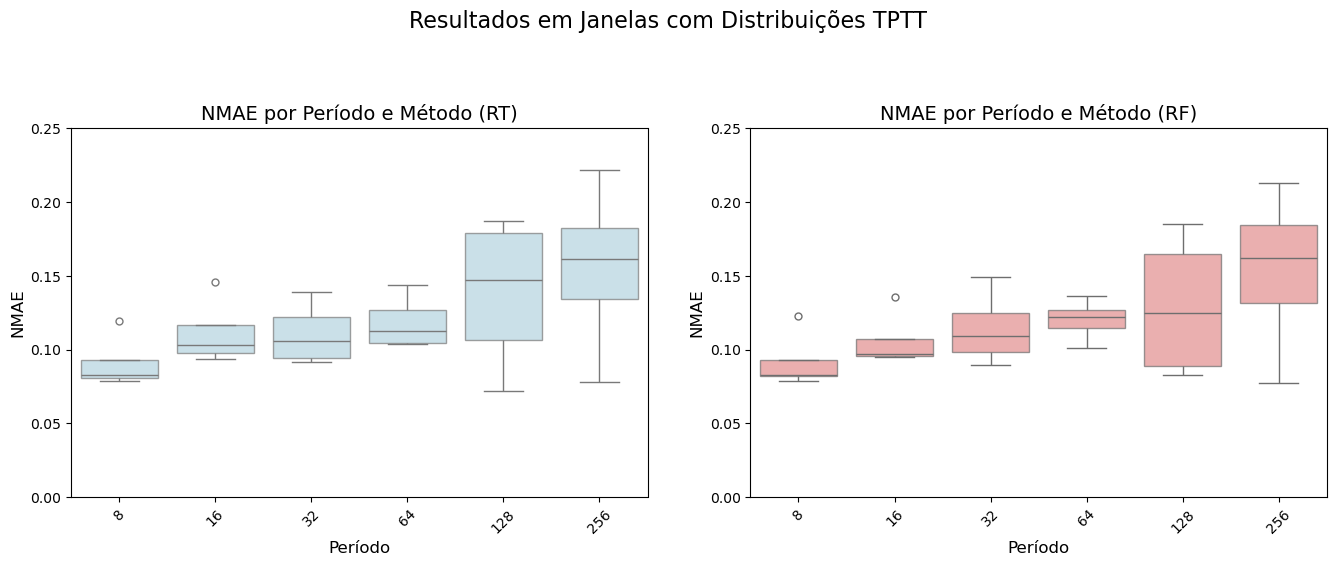

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.25)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RT'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Método (RT)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RF'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Método (RF)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados em Janelas com Distribuições TPTT", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()


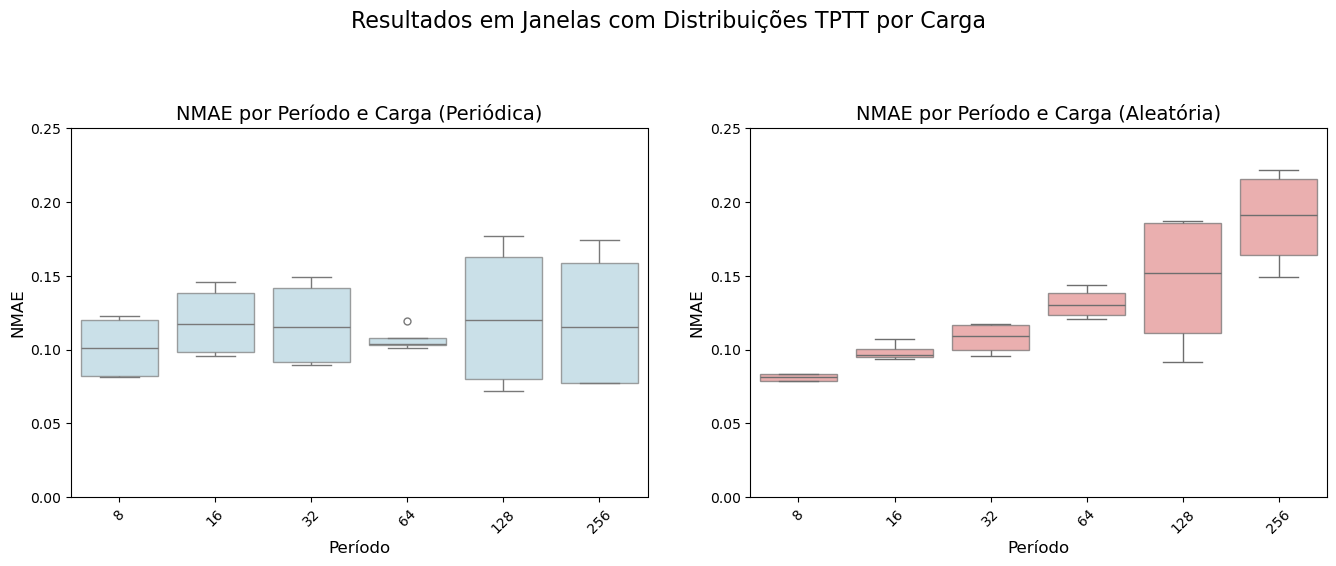

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.25)

sns.boxplot(x='período', y='nmae', data=data[data['carga'] == 'PeriodicLoad'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Carga (Periódica)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['carga'] == 'FlashcrowdLoad'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Carga (Aleatória)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados em Janelas com Distribuições TPTT por Carga", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()
